<a href="https://colab.research.google.com/github/Gabrielbenard/A3Data_desafio/blob/main/A3datachurn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -U ydata-profiling Yellowbrick shap

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from ydata_profiling import ProfileReport
from yellowbrick.classifier import ClassificationReport
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.metrics import f1_score, roc_auc_score

In [ ]:
data = pd.read_csv("churn-A3data.csv")
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7569-NMZYQ,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),"118,75","8672,45",No
1,8984-HPEMB,Female,0,No,No,71,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Electronic check,"118,65","8477,6",No
2,5989-AXPUC,Female,0,Yes,No,68,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,No,Mailed check,"118,6","7990,05",No
3,5734-EJKXG,Female,0,No,No,61,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Electronic check,"118,6","7365,7",No
4,8199-ZLLSA,Male,0,No,No,67,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic),"118,35","7804,15",Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0621-CXBKL,Female,0,No,No,53,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,"18,7","1005,7",No
7039,9945-PSVIP,Female,0,Yes,Yes,25,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Mailed check,"18,7","383,65",No
7040,0827-ITJPH,Male,0,No,No,36,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Credit card (automatic),"18,55",689,No
7041,9764-REAFF,Female,0,Yes,No,59,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),"18,4","1057,85",No


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        7043 non-null   object
 1   gender            7043 non-null   object
 2   SeniorCitizen     7043 non-null   int64 
 3   Partner           7043 non-null   object
 4   Dependents        7043 non-null   object
 5   tenure            7043 non-null   int64 
 6   PhoneService      7043 non-null   object
 7   MultipleLines     7043 non-null   object
 8   InternetService   7043 non-null   object
 9   OnlineSecurity    7043 non-null   object
 10  OnlineBackup      7043 non-null   object
 11  DeviceProtection  7043 non-null   object
 12  TechSupport       7043 non-null   object
 13  StreamingTV       7043 non-null   object
 14  StreamingMovies   7043 non-null   object
 15  Contract          7043 non-null   object
 16  PaperlessBilling  7043 non-null   object
 17  PaymentMethod 

In [ ]:
data["TotalCharges"].isnull().sum()

np.int64(11)

Data exploration

In [ ]:
profile = ProfileReport(data, title="Pandas Profiling Report")
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 21/21 [00:00<00:00, 22.81it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
data['Churn'].value_counts()

,count
Churn,
No,5174
Yes,1869


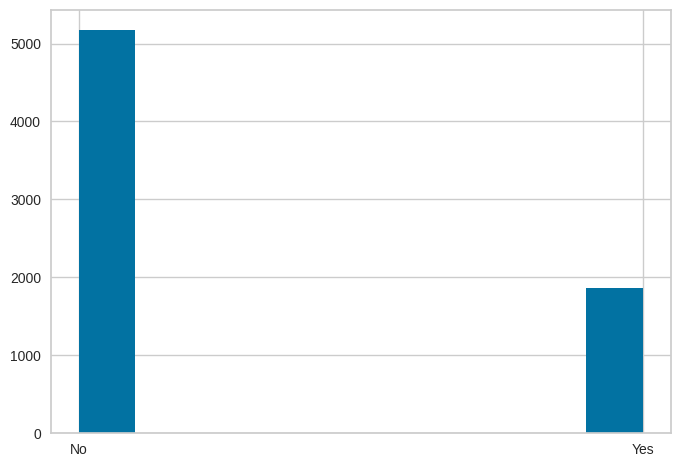

In [ ]:
plt.hist(data["Churn"],bins=10)
plt.show()

In [ ]:
data['Contract'].unique()

array(['Two year', 'One year', 'Month-to-month'], dtype=object)

In [ ]:
data.describe(include=['O'])

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7032,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,1585,6530,2
top,6823-SIDFQ,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,"20,05","20,2",No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,61,11,5174


Data pre-processing

In [ ]:
df2 = data.copy()
df2['TotalCharges'] = df2['TotalCharges'].str.replace(',', '.', regex=False)
df2['MonthlyCharges'] = df2['MonthlyCharges'].str.replace(',', '.', regex=False)

df2['MonthlyCharges'] = pd.to_numeric(df2['MonthlyCharges'], errors= 'coerce')
df2['TotalCharges'] = pd.to_numeric(df2['TotalCharges'], errors= 'coerce')

In [ ]:
df2

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7569-NMZYQ,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),118.75,8672.45,No
1,8984-HPEMB,Female,0,No,No,71,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Electronic check,118.65,8477.60,No
2,5989-AXPUC,Female,0,Yes,No,68,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,No,Mailed check,118.60,7990.05,No
3,5734-EJKXG,Female,0,No,No,61,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Electronic check,118.60,7365.70,No
4,8199-ZLLSA,Male,0,No,No,67,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic),118.35,7804.15,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0621-CXBKL,Female,0,No,No,53,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,18.70,1005.70,No
7039,9945-PSVIP,Female,0,Yes,Yes,25,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Mailed check,18.70,383.65,No
7040,0827-ITJPH,Male,0,No,No,36,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Credit card (automatic),18.55,689.00,No
7041,9764-REAFF,Female,0,Yes,No,59,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),18.40,1057.85,No


In [ ]:
imputer = SimpleImputer(strategy='mean')
df2["TotalCharges"] = imputer.fit_transform(df2[["TotalCharges"]])
df2["TotalCharges"].isnull().sum()

np.int64(0)

In [ ]:
X = df2.drop(['customerID','Churn'],axis = 1)
y = df2['Churn'].map({'Yes': 1, 'No': 0})

In [ ]:
df2['Churn'].value_counts()

,count
Churn,
No,5174
Yes,1869


In [ ]:
categorical_columns = X.select_dtypes(include =['object']).columns.tolist()
numerical_columns = X.select_dtypes(include =['int64', 'float64']).columns.tolist()

In [ ]:
numeric_transformer = Pipeline(steps= [
    ('scaler',StandardScaler())
])

categorical_transformer = Pipeline(steps= [
    ('onehot',OneHotEncoder(drop='first',
                            sparse_output=False,
                            handle_unknown ='ignore'))
])


preprocessor =  ColumnTransformer(transformers = [
    ('num', numeric_transformer, numerical_columns),
    ('cat', categorical_transformer, categorical_columns)
])

pipeline = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])


pre processing sem pipeline

In [ ]:
label_encoder = LabelEncoder()
for col in categorical_columns:
    X[col] = LabelEncoder().fit_transform(X[col])
# X[numerical_columns] = standard_esc.fit_transform(X[numerical_columns])

Model Training

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42,
                                                    stratify = y)


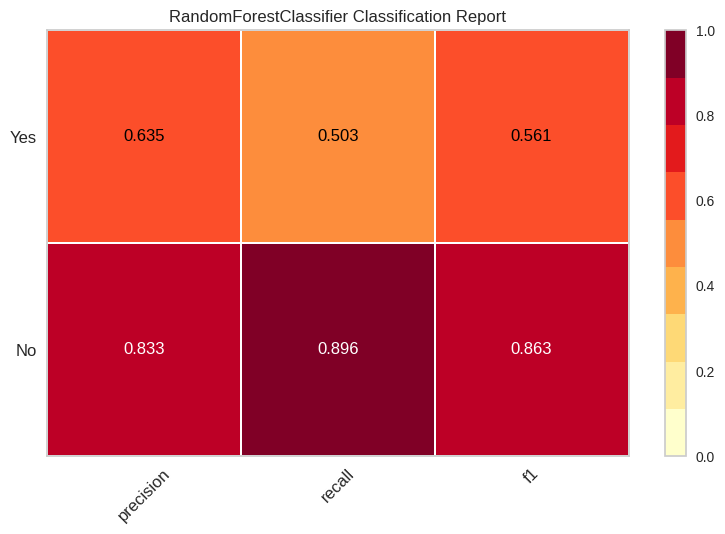

<Axes: title={'center': 'RandomForestClassifier Classification Report'}>

In [ ]:
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
y_proba = pipeline.predict_proba(X_test)[:, 1]

visualizer = ClassificationReport(pipeline, classes=['No', 'Yes'])
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

In [ ]:
print(f"F1-score : {f1_score(y_test, y_pred):.4f}")
print(f"AUC-ROC  : {roc_auc_score(y_test, y_proba):.4f}\n")

F1-score : 0.5612
AUC-ROC  : 0.8220



In [ ]:
X_train

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
4137,1,0,1,1,31,0,1,0,2,0,2,2,2,2,1,0,2,59.95,1848.80
3599,1,0,1,1,2,1,0,1,0,0,0,0,0,0,0,0,3,69.95,143.90
5256,0,0,1,1,67,0,1,0,2,2,0,0,0,0,2,0,0,36.15,2434.45
4241,0,0,1,1,33,1,0,0,2,2,2,0,0,0,1,1,3,58.45,1955.40
4189,1,0,1,1,2,1,0,0,2,2,0,2,0,0,2,0,3,59.50,130.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6452,1,0,0,1,14,1,0,2,1,1,1,1,1,1,0,0,3,19.95,268.40
5173,1,0,1,0,9,0,1,0,0,0,0,2,2,0,0,0,3,40.65,328.95
3477,1,0,1,1,1,1,0,1,0,0,0,0,0,0,0,1,3,70.65,70.65
3058,1,0,1,0,16,1,2,1,0,0,0,0,0,0,0,1,2,75.40,1189.40


Shap

In [ ]:
import shap

In [ ]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# sample_X = shap.utils.sample(X_train, 200, random_state=42)

# explainer = shap.Explainer(model, sample_X)
# shap_values = explainer(sample_X,check_additivity=False)

explainer = shap.Explainer(model, X_train)
shap_values = explainer(X_train, check_additivity=False)

100%|===================| 11264/11268 [12:51<00:00]       

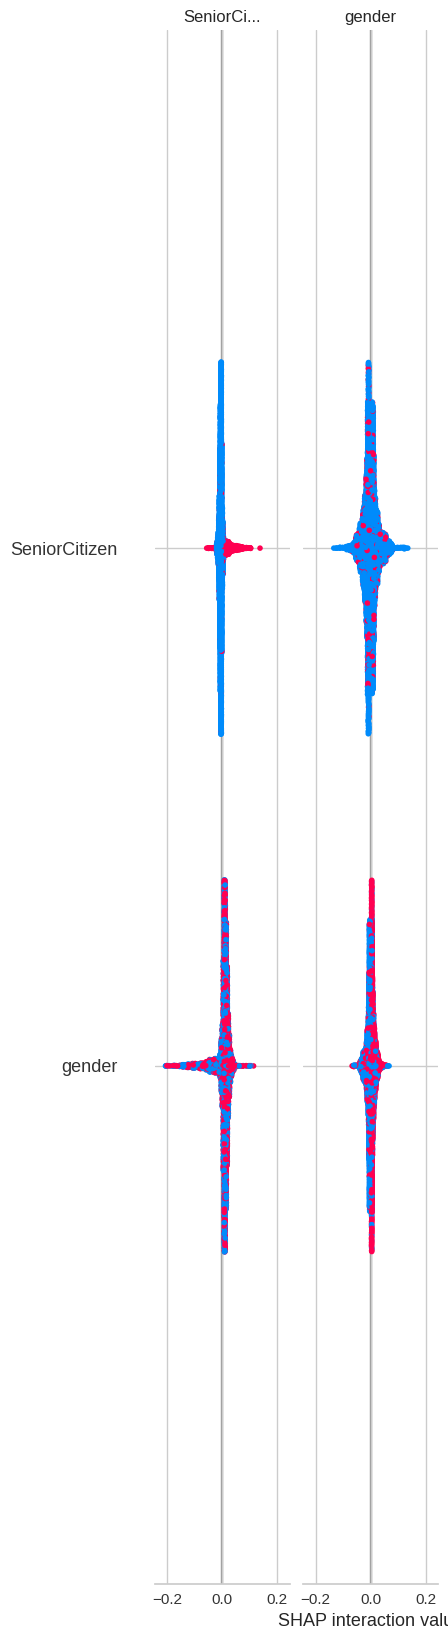

In [ ]:
shap.summary_plot(
    shap_values,
    X_train,
    feature_names = X_train.columns,
    plot_type = "bar",
    max_display=X_train.shape[1]
)

In [ ]:
shap.initjs()

In [ ]:
shap.plots.force(shap_values,shap_values[0,:,0],features = X_test.iloc[0], feature_names= X_train.columns )

TypeError: In v0.20, force plot now requires the base value as the first parameter! Try shap.plots.force(explainer.expected_value, shap_values) or for multi-output models try shap.plots.force(explainer.expected_value[0], shap_values[..., 0]).

In [ ]:
i = 25  # exemplo específico
shap.plots.force(
    shap_values[i, :, 0],
)


In [ ]:
i = 25
shap.plots.force(shap_values[i, :, 1])  # pega apenas a classe 1


In [ ]:
shap.plots.bar(shap_values, max_display=10)


IndexError: list index out of range

In [ ]:
shap.plots.beeswarm(shap_values, max_display=10)


ValueError: The beeswarm plot does not support plotting explanations with instances that have more than one dimension!